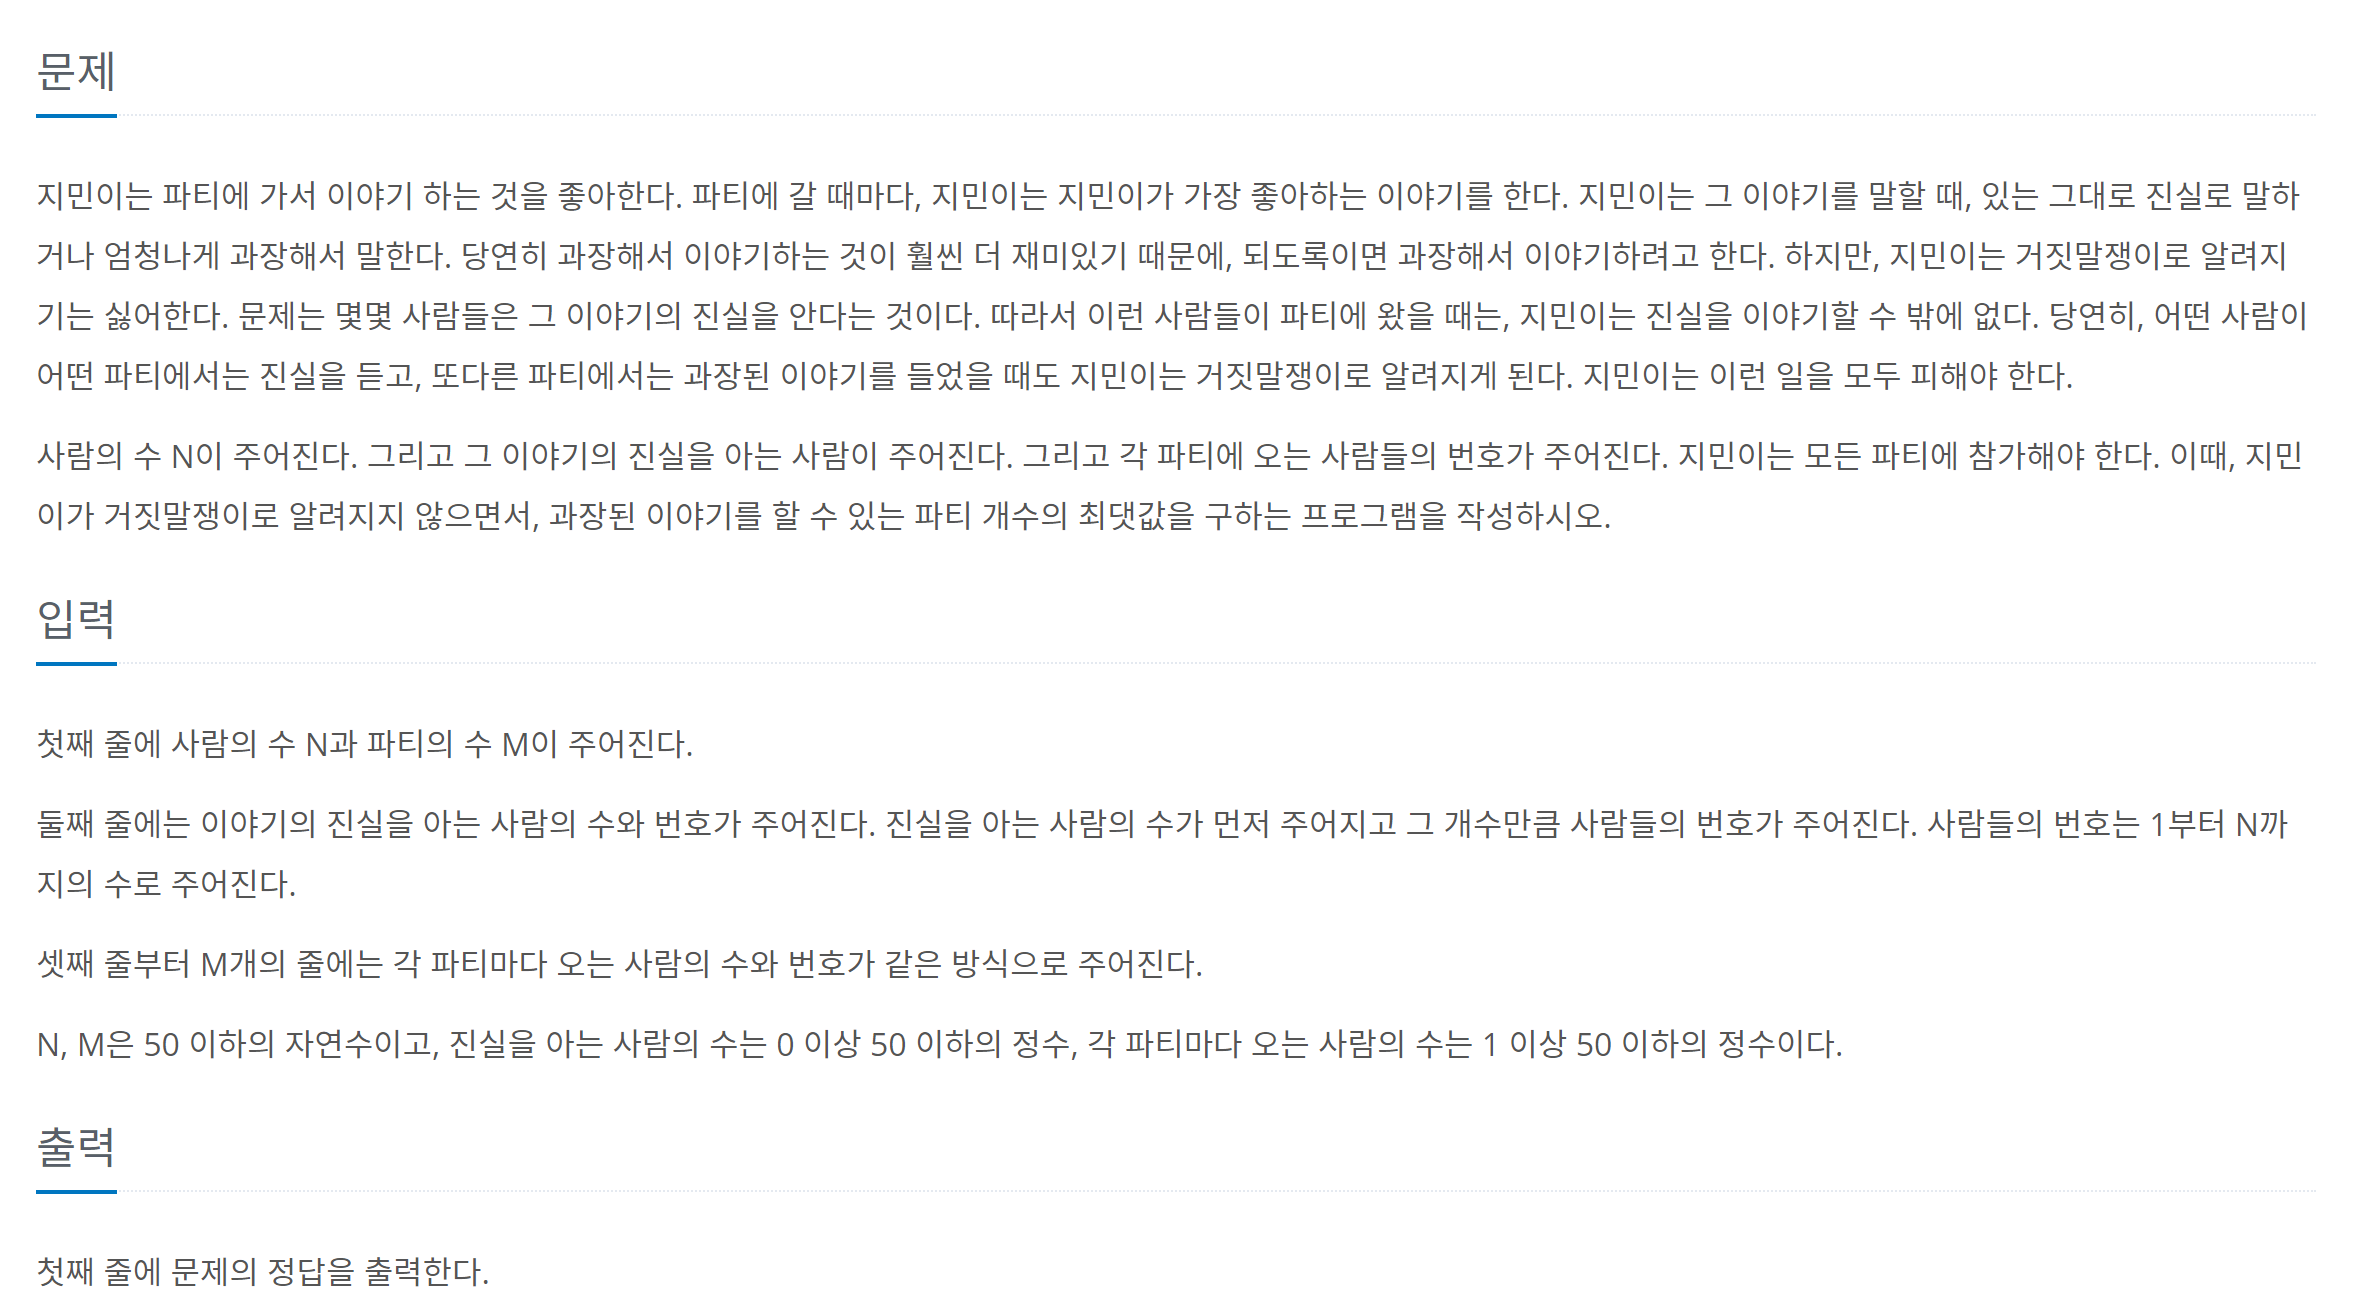

진실을 아는 사람이 들어있는 집합은 제외하고 나머지 집합의 개수를 카운트하면 되는 문제다.

In [10]:
from collections import deque


def ansfounder():
    n, m = map(int, input().split())
    truth = input().split()
    if truth == 0:
        return m
    else :
        truth = set(map(int, truth[1:]))
    parties = []
    for _ in range(m):
        parties.append(set(map(int, input().split()[1:])))

    graph = {i: set() for i in range(1, n+1)}
    for party in parties:
        party_list = list(party)
        for i in range(len(party_list)):
            for j in range(i+1, len(party_list)):
                graph[party_list[i]].add(party_list[j])
                graph[party_list[j]].add(party_list[i])


    q = deque()
    for person in truth:
        q.append(person)
        visited = set(truth)
    while q:
        node = q.popleft()
        for neighbor in graph[node]:
            if neighbor not in visited:
                visited.add(neighbor)
                q.append(neighbor)

    count = 0
    for party in parties:
        if not truth.intersection(party) and not visited.intersection(party):
            count += 1
    return count

print(ansfounder())


KeyboardInterrupt: Interrupted by user

In [32]:
def ansfounder():
    n, m = map(int, input().split())
    truth = input().split()
    if truth == 0:
        return m
    else:
        truth = set(map(int, truth[1:]))
    parties = []
    for _ in range(m):
        parties.append(set(map(int, input().split()[1:])))

    graph = {i: set() for i in range(1, n+1)}
    for party in parties:
        
        party_list = list(party)
        for i in range(len(party_list)):
            for j in range(i+1, len(party_list)):
                graph[party_list[i]].add(party_list[j])
                graph[party_list[j]].add(party_list[i])

    q = deque()
    visited = set(truth)
    for person in truth:
        q.append(person)
    while q:
        node = q.popleft()
        for neighbor in graph[node]:
            if neighbor not in visited:
                visited.add(neighbor)
                q.append(neighbor)

    count = 0
    for party in parties:
        if not truth.intersection(party) and not visited.intersection(party):
            count += 1
    return count

print(ansfounder())


 6 5
 1 6
 2 4 5
 2 1 2
 2 2 3
 2 3 4
 2 5 6


0


In [35]:
def dfs(node, graph, visited):
    visited.add(node)
    for neighbor in graph[node]:
        if neighbor not in visited:
            dfs(neighbor, graph, visited)


def count_untruthful_parties(n, m, truth, parties):
    truth = set(map(int, truth[1:]))
    graph = {i: set() for i in range(1, n+1)}
    for party in parties:
        for i in range(1, len(party)):
            for j in range(i+1, len(party)):
                graph[int(party[i])].add(int(party[j]))
                graph[int(party[j])].add(int(party[i]))
    visited = set(truth)
    for person in truth:
        dfs(person, graph, visited)
    count = 0
    for party in parties:
        if not truth.intersection(set(party)) and not visited.intersection(set(party)):
            count += 1
    return count



def main():
    n, m = map(int, input().split())
    truth = input().split()
    parties = [list(map(int, input().split())) for _ in range(m)]
    print(count_untruthful_parties(n, m, truth, parties))


if __name__ == '__main__':
    main()


 4 3 
 1 1
 2 1 2
 1 3
 1 1


0


In [ ]:
import sys
input = sys.stdin.readline

def find(parent, x):
    if x != parent[x]:
        parent[x] = find(parent, parent[x])

    return parent[x]

# 사실을 아는 사람과 Union시, 해당 사람이 부모노드가 되도록
def union(parent, a, b, know_truth):
    a = find(parent, a)
    b = find(parent, b)

    if a in know_truth and b in know_truth:
        return

    if a in know_truth:
        parent[b] = a
    
    elif b in know_truth:
        parent[a] = b
    
    else:
        if a < b:
            parent[b] = a
        
        else:
            parent[a] = b


n, m = map(int, input().split())
know_truth = list(map(int, input().split()))[1:]

parties = []
parent = list(range(n+1))

for _ in range(m):
    party_info = list(map(int, input().split()))
    party_len = party_info[0]
    party = party_info[1:]
    
    for i in range(party_len - 1):
        union(parent, party[i], party[i+1], know_truth)
    
    parties.append(party)
    
ans = 0
for party in parties:
    for i in range(len(party)):
        if find(parent, party[i]) in know_truth:
            break
    
    else:
        ans += 1

print(ans)